# Assignment 01 Module2- 20-06-2023
# Ahmad Ali

# Task 1:-

In [29]:
import pandas as pd
df=pd.read_csv('Cat_human_New.csv')
df.duplicated().sum()
df.isnull().sum()
n_df=df[['Height','Legs','Weight','label']]
n_df

,Height,Legs,Weight,label
0,5.14,2,70.000000,human
1,6.80,2,64.400000,human
2,5.00,2,64.800000,human
3,5.90,2,78.800000,human
4,6.56,2,73.200000,human
...,...,...,...,...
195,1.14,4,2.304511,Cat
196,1.39,4,5.687970,Cat
197,0.53,4,6.364662,Cat
198,1.03,4,6.590226,Cat


# Task 2

Confusion Matrix:
[70  0]
[ 0 70]
Accuracy: 100.0 %
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


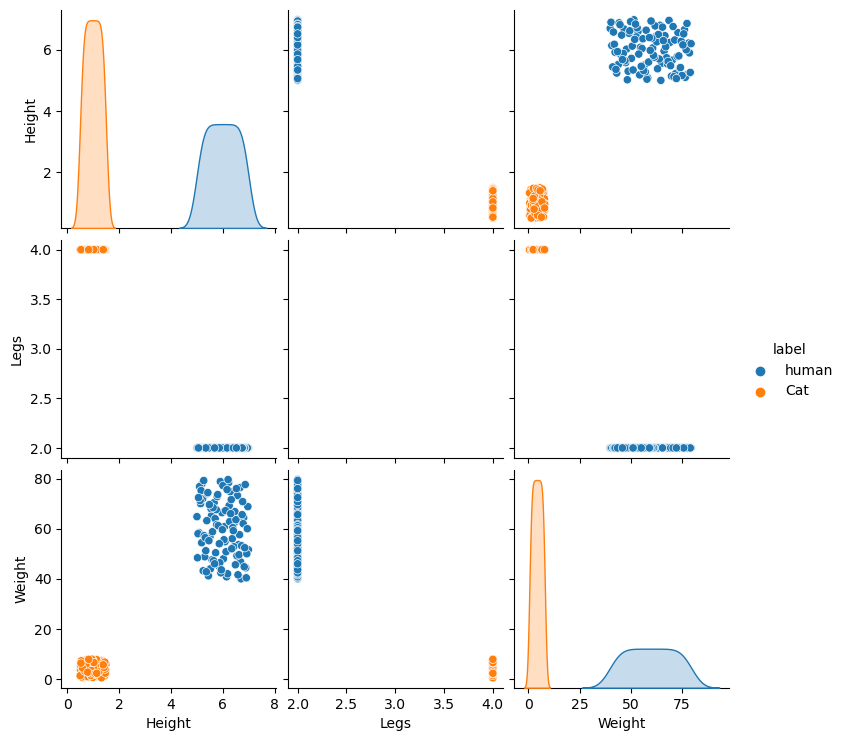

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from math import sqrt
import joblib
from matplotlib.colors import ListedColormap

# Data Preprocessing:-

X=n_df[['Height','Legs','Weight']]
y=n_df['label']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
label_encoder = LabelEncoder()
y_encoded =label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.7,random_state=42)

# Split dataset into training and testing data:-

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred =model.predict(X_test)


# Save the trained model:-
joblib.dump(model, 'model.pkl')


# Save the preprocessing objects:-
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Confusion Matrix:-
conf_mat= confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat[0])
print(conf_mat[1])

# Accuracy:-
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,'%')

# Precision:-
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall:-
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# f1:-
f_1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f_1)


sns.pairplot(df, hue='label')
plt.show()

# Task 3

In [35]:
import joblib
import pandas as pd
model= joblib.load('model.pkl')
scaler= joblib.load('scaler.pkl')
label_encoder= joblib.load('label_encoder.pkl')

Height= float(input("Enter Height: "))
Legs=int(input('Enter legs: '))
Weight= float(input("Enter Weight: "))
data= pd.DataFrame([[Height,Legs,Weight]], columns=['Height','Legs','Weight'])

a=scaler.transform(data)
b=model.predict(a)
p_s=label_encoder.inverse_transform(b)
p_s

Enter Height: 5.5
Enter legs: 2
Enter Weight: 70


array(['human'], dtype=object)